<a href="https://colab.research.google.com/github/Ayman-Abdeen/chatboot-/blob/main/BERT/chatboot_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 6.5 MB 30.5 MB/s 
     |████████████████████████████████| 895 kB 38.9 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import pandas as pd
import re
import torch
import random
import torch.nn as nn
import transformers
import matplotlib.pyplot as plt
device = torch.device("cuda")
from transformers import AutoModel, BertTokenizerFast,RobertaTokenizer, RobertaModel,DistilBertTokenizer, DistilBertModel

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
# Import BERT-base pretrained model
bert = AutoModel.from_pretrained("bert-base-uncased")


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Load the Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
# Import Roberta pretrained model
bert = RobertaModel.from_pretrained("roberta-base")


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Load the DistilBert tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# Import the DistilBert pretrained model
bert = DistilBertModel.from_pretrained("distilbert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = ["this is a distil bert model.","data is oil"]
# Encode the text
encoded_input = tokenizer(text, padding=True,truncation=True, return_tensors='pt')
print(encoded_input)

{'input_ids': tensor([[  101,  2023,  2003,  1037,  4487, 16643,  2140, 14324,  2944,  1012,
           102],
        [  101,  2951,  2003,  3514,   102,     0,     0,     0,     0,     0,
             0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]])}


In [ ]:
import json
def readJson(filename):
  with open(filename, 'r') as file:
    intents = json.load(file)
    return intents

In [ ]:
medical = readJson('intents.json')

In [ ]:
medical_DF = pd.DataFrame(columns=["label", "Text"])

In [ ]:
all_words = []
tags = []
xy = []
i=0
# loop through each sentence in our intents patterns
for intent in medical['intents']:
    tag = intent['tag']
    # add to tag list
    tags.append(tag)
    for pattern in intent['patterns']:

        medical_DF.loc[i] = [tag, pattern]


        # tokenize each word in the sentence
        #w = nltk.word_tokenize(pattern)
        # add to our words list
        all_words.extend(pattern)
        # add to xy pair
        xy.append((pattern, tag))
        i=i+1
    

In [ ]:
len(tags)


48

In [ ]:
medical_DF

,label,Text
0,greeting,Hi
1,greeting,Hey
2,greeting,How are you
3,greeting,Is anyone there?
4,greeting,Hello
...,...,...
199,CPR,How to help a drowning person in CPR?
200,Fracture,How do you treat a Fracture?
201,Fracture,what to do if i get a Fracture?
202,Fracture,Which medicine to take if I have a Fracture?


In [ ]:
# We have prepared a chitchat dataset with 5 labels
#df = pd.read_csv("chitchat - Sheet1.csv")
df = medical_DF
df.head()
df["label"].value_counts()
# Converting the labels into encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
# check class distribution
df['label'].value_counts(normalize = True)

39    0.034314
42    0.029412
1     0.029412
33    0.029412
23    0.029412
9     0.024510
45    0.024510
8     0.024510
35    0.019608
34    0.019608
36    0.019608
37    0.019608
24    0.019608
12    0.019608
5     0.019608
25    0.019608
19    0.019608
44    0.019608
18    0.019608
13    0.019608
26    0.019608
7     0.019608
27    0.019608
11    0.019608
4     0.019608
28    0.019608
21    0.019608
43    0.019608
22    0.019608
47    0.019608
46    0.019608
31    0.019608
32    0.019608
14    0.019608
30    0.019608
17    0.019608
29    0.019608
0     0.019608
3     0.019608
2     0.019608
6     0.019608
38    0.019608
10    0.019608
16    0.019608
20    0.019608
15    0.019608
40    0.014706
41    0.014706
Name: label, dtype: float64

In [ ]:
# In this example we have used all the utterances for training purpose
train_text, train_labels = df["Text"], df["label"]


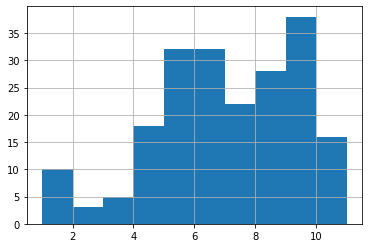

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 10)
# Based on the histogram we are selecting the max len as 8
max_seq_len = 8


In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer(
    train_text.tolist(),
    max_length = max_seq_len,
    padding=True,
    truncation=True,
    return_token_type_ids=False
)


In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
#define a batch size
batch_size = 16
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# DataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


In [ ]:
class BERT_Arch(nn.Module):
   def __init__(self, bert):      
       super(BERT_Arch, self).__init__()
       self.bert = bert 
      
       # dropout layer
       self.dropout = nn.Dropout(0.2)
      
       # relu activation function
       self.relu =  nn.ReLU()
       # dense layer
       self.fc1 = nn.Linear(768,512)
       self.fc2 = nn.Linear(512,256)
       self.fc3 = nn.Linear(256,48)
       #softmax activation function
       self.softmax = nn.LogSoftmax(dim=1)
       #define the forward pass
   def forward(self, sent_id, mask):
      #pass the inputs to the model  
      cls_hs = self.bert(sent_id, attention_mask=mask)[0][:,0]
      
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      
      x = self.fc2(x)
      x = self.relu(x)
      x = self.dropout(x)
      # output layer
      x = self.fc3(x)
   
      # apply softmax activation
      x = self.softmax(x)
      return x


In [ ]:
!pip install torchinfo

In [ ]:
# freeze all the parameters. This will prevent updating of model weights during fine-tuning.
for param in bert.parameters():
      param.requires_grad = False
model = BERT_Arch(bert)
# push the model to GPU
model = model.to(device)
from torchinfo import summary
summary(model)


Layer (type:depth-idx)                                  Param #
BERT_Arch                                               --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              (23,440,896)
│    │    └─Embedding: 3-2                              (393,216)
│    │    └─LayerNorm: 3-3                              (1,536)
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             (42,527,232)
├─Dropout: 1-2                                          --
├─ReLU: 1-3                                             --
├─Linear: 1-4                                           393,728
├─Linear: 1-5                                           131,328
├─Linear: 1-6                                           12,336
├─LogSoftmax: 1-7                                       --
Total

In [ ]:
from transformers import AdamW
# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
#compute the class weights
class_wts = compute_class_weight(class_weight = "balanced",
                                        classes = np.unique(train_labels),
                                        y = train_labels)
print(class_wts)


[1.0625     0.70833333 1.0625     1.0625     1.0625     1.0625
 1.0625     1.0625     0.85       0.85       1.0625     1.0625
 1.0625     1.0625     1.0625     1.0625     1.0625     1.0625
 1.0625     1.0625     1.0625     1.0625     1.0625     0.70833333
 1.0625     1.0625     1.0625     1.0625     1.0625     1.0625
 1.0625     1.0625     1.0625     0.70833333 1.0625     1.0625
 1.0625     1.0625     1.0625     0.60714286 1.41666667 1.41666667
 0.70833333 1.0625     1.0625     0.85       1.0625     1.0625    ]


In [ ]:
#convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
cross_entropy = nn.NLLLoss(weight=weights) 

In [ ]:
# empty lists to store training and validation loss of each epoch
from torch.optim.lr_scheduler import StepLR
train_losses=[]
# number of training epochs
epochs = 1000
# We can also use learning rate scheduler to achieve better results
lr_sch = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [ ]:
# function to train the model
def train():
  
  model.train()
  total_loss = 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step,len(train_dataloader)))
    # push the batch to gpu
    batch = [r.to(device) for r in batch] 
    sent_id, mask, labels = batch
    # get model predictions for the current batch
    preds = model(sent_id, mask)
    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)
    # add on to the total loss
    total_loss = total_loss + loss.item()
    # backward pass to calculate the gradients
    loss.backward()
    # clip the the gradients to 1.0. It helps in preventing the    exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    # update parameters
    optimizer.step()
    # clear calculated gradients
    optimizer.zero_grad()
  
    # We are not using learning rate scheduler as of now
    # lr_sch.step()
    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()
    # append the model predictions
    total_preds.append(preds)
  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
    
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)
  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# Store our loss and accuracy for plotting
train_loss_set = []

for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    #train model
    train_loss, _ = train()

    print(f'\nTraining Loss: {train_loss:.3f}')
   
    train_loss_set.append(train_loss) 
    # append training and validation loss
    train_losses.append(train_loss)
    # it can make your experiment reproducible, similar to set  random seed to all options where there needs a random seed.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
print(f'\nTraining Loss: {train_loss:.3f}')


 Epoch 1 / 1000

Training Loss: 3.925

 Epoch 2 / 1000

Training Loss: 3.879

 Epoch 3 / 1000

Training Loss: 3.878

 Epoch 4 / 1000

Training Loss: 3.875

 Epoch 5 / 1000

Training Loss: 3.862

 Epoch 6 / 1000

Training Loss: 3.853

 Epoch 7 / 1000

Training Loss: 3.828

 Epoch 8 / 1000

Training Loss: 3.802

 Epoch 9 / 1000

Training Loss: 3.754

 Epoch 10 / 1000

Training Loss: 3.680

 Epoch 11 / 1000

Training Loss: 3.636

 Epoch 12 / 1000

Training Loss: 3.605

 Epoch 13 / 1000

Training Loss: 3.566

 Epoch 14 / 1000

Training Loss: 3.542

 Epoch 15 / 1000

Training Loss: 3.486

 Epoch 16 / 1000

Training Loss: 3.445

 Epoch 17 / 1000

Training Loss: 3.406

 Epoch 18 / 1000

Training Loss: 3.351

 Epoch 19 / 1000

Training Loss: 3.339

 Epoch 20 / 1000

Training Loss: 3.249

 Epoch 21 / 1000

Training Loss: 3.257

 Epoch 22 / 1000

Training Loss: 3.176

 Epoch 23 / 1000

Training Loss: 3.159

 Epoch 24 / 1000

Training Loss: 3.133

 Epoch 25 / 1000

Training Loss: 3.113

 Epoch 2

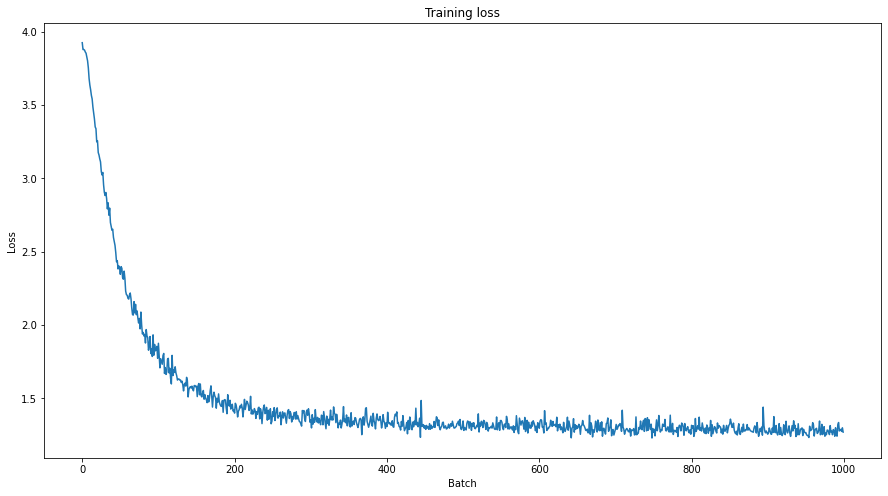

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
import json
f=open("intents.json")
data = json.load(f)
def get_prediction(str):
 str = re.sub(r"[^a-zA-Z ]+", "", str)
 test_text = [str]
 model.eval()
 tokens_test_data = tokenizer(
 test_text,
 max_length = max_seq_len,
 padding=True,
 truncation=True,
 return_token_type_ids=False
 )
 test_seq = torch.tensor(tokens_test_data["input_ids"])
 test_mask = torch.tensor(tokens_test_data["attention_mask"])
 
 preds = None
 with torch.no_grad():
   preds = model(test_seq.to(device), test_mask.to(device))
 preds = preds.detach().cpu().numpy()
 preds = np.argmax(preds, axis = 1)
 #print("Intent Identified: ", le.inverse_transform(preds)[0])
 return le.inverse_transform(preds)[0]
def get_response(message): 
  intent = get_prediction(message)
  #print(intent)
  for i in data['intents']: 
    if i["tag"] == intent:
      result = random.choice(i["responses"])
      break
  #print(f"Response : {result}")
  #return "Intent: "+ intent + '\n' + "Response: " + result
  return result

In [ ]:
get_response("hi")

'Hi there, how can I help?'

In [ ]:
get_response("How do I handle Cuts")

'Wash the cut properly to prevent infection and stop the bleeding by applying pressure for 1-2minutes until bleeding stops. Apply Petroleum Jelly to make sure that the wound is moist for quick healing. Finally cover the cut with a sterile bandage. Pain relievers such as acetaminophen can be applied.'

In [ ]:
bot_name = "Aymon"
print("Let's chat! (type 'quit' to exit)")
while True:
    # sentence = "do you use credit cards?"
    sentence = input("You: ")
    if sentence == "quit":
        break
    X = sentence
    

    predicted = get_prediction(X)

    #tag = tags[predicted.item()]

    print(f"{bot_name}: {get_response(X)}")


Let's chat! (type 'quit' to exit)
You: hi
Aymon: Hello, thanks for visiting
You: my muscle is pulled
Aymon: 1) Apply ice for 10 to 15 minutes every 1 hour for the first day and every 3 to 4 hours after that. Use ice for the first 3 days. After 3 days, either heat or ice may be helpful if you still have pain. Rest the pulled muscle for at least a day. 
You: How do I handle Cuts
Aymon: Wash the cut properly to prevent infection and stop the bleeding by applying pressure for 1-2minutes until bleeding stops. Apply Petroleum Jelly to make sure that the wound is moist for quick healing. Finally cover the cut with a sterile bandage. Pain relievers such as acetaminophen can be applied.
You:  Had an accident that caused Abrasions
Aymon: Begin with washed hands.Gently clean the area with cool to lukewarm water and mild soap. Remove dirt or other particles from the wound using sterilized tweezers.For a mild scrape that’s not bleeding, leave the wound uncovered.If the wound is bleeding, use a clea